A partir del dataset mnist (tf.keras.datasets.mnist.load_data()), realiza una clasificación usando:

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

¿ Cuál ha dado mejor resultado?

Para compilar el modelo, usa:

In [4]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.1


In [5]:
tf.keras.datasets.mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [125]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [110]:
# 60,000 imagenes en el set de entrenamiento
train_images.shape

(60000, 28, 28)

In [98]:
# Asimismo, hay 60,000 etiquetas en el set de entrenamiento:
len(train_labels)

60000

In [40]:
# Cada etiqueta es un integro entre 0 y 9:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [41]:
# Hay 10,000 imagenes en el set de pruebas. Otra vez, cada imagen es representada como pixeles de 28x28:
test_images.shape

(10000, 28, 28)

In [42]:
# Y el set de pruebas contiene 10,000 etiquetas de imagen:
len(test_labels)

10000

# Pre-procese el set de datos
El set de datos debe ser pre-procesada antes de entrenar la red. Si usted inspecciona la primera imagen en el set de entrenamiento, va a encontrar que los valores de los pixeles estan entre 0 y 255:

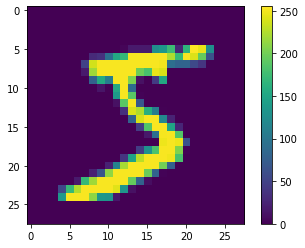

In [99]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Escale estos valores en un rango de 0 a 1 antes de alimentarlos al modelo de la red neuronal. Para hacero, divida los valores por 255. Es importante que el training set y el testing set se pre-procesen de la misma forma:

In [126]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Para verificar que el set de datos esta en el formato adecuado y que estan listos para construir y entrenar la red, vamos a desplegar las primeras 25 imagenes de el training set y despleguemos el nombre de cada clase debajo de cada imagen.

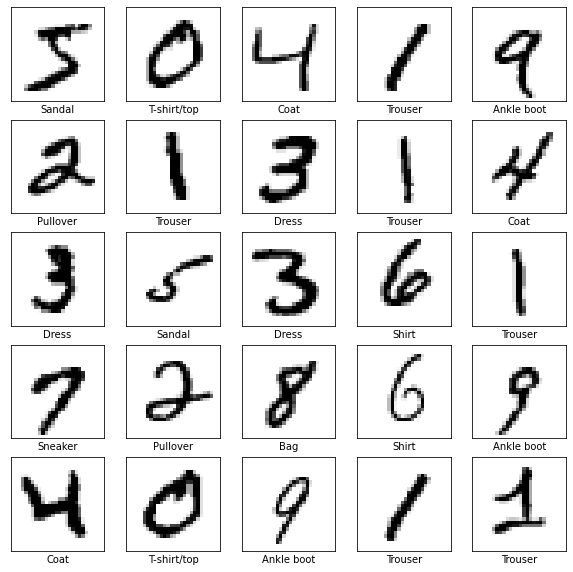

In [101]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Construir el Modelo
Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

### Configurar las Capas
Los bloques de construccion basicos de una red neuronal son las capas o layers. Las capas extraen representaciones de el set de datos que se les alimentan. Con suerte, estas representaciones son considerables para el problema que estamos solucionando.

La mayoria de aprendizaje profundo consiste de unir capas sencillas. La mayoria de las capas como tf.keras.layers.Dense, tienen parametros que son aprendidos durante el entrenamiento.

In [46]:
train_images.shape

(60000, 28, 28)

In [47]:
test_images.shape

(10000, 28, 28)

In [127]:
train_images_gr = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images_gr = test_images.reshape(test_images.shape[0], 28, 28, 1)

print("train_images_gr shape:", train_images_gr.shape)
print("test_images_gr shape:", test_images_gr.shape)

train_images_gr shape: (60000, 28, 28, 1)
test_images_gr shape: (10000, 28, 28, 1)


In [ ]:
1. Una CNN con:

    1 capa convolutiva con 8 neuronas
    1 MaxPool quedando las dimensiones de la imagen a la mitad
    1 dropout 0.25
    1 Flatten
    1 dense con 32 neuronas
    1 dense con 10 (salida)

In [128]:
# Configurar capas
"""
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
"""
tf.config.run_functions_eagerly(True)


INPUT_SHAPE = (28,28,1)

model = keras.models.Sequential()
# filte= numero neuronas
# First conv-pool layers - set 1
model.add(keras.layers.Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="valid", input_shape=INPUT_SHAPE))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))


# Flatten layer
model.add(keras.layers.Flatten())

# Dense layer with dropout
model.add(keras.layers.Dense(units=32, activation="relu"))
model.add(keras.layers.Dropout(rate=0.25))
# Output layer
model.add(keras.layers.Dense(units=10, activation="softmax"))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1352)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 32)                43296     
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                330       
Total params: 43,706
Trainable params: 43,706
Non-trainable params: 0
__________________________________________________

In [129]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1352)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 32)                43296     
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                330       
Total params: 43,706
Trainable params: 43,706
Non-trainable params: 0
__________________________________________________

### Entrenar el modelo

In [130]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3711 - accuracy: 0.8875
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1661 - accuracy: 0.9497
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1309 - accuracy: 0.9597
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1157 - accuracy: 0.9645
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1052 - accuracy: 0.9675
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0949 - accuracy: 0.9706
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0876 - accuracy: 0.9721
Epoch 8/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0803 - accuracy: 0.9746
Epoch 9/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0792 - accuracy: 0.9752
Epoch 10/10
1875/1875 [==============================] - 35s 18m

### Evaluar Exactitud
Siguente, compare como el rendimiento del modelo sobre el set de datos:

In [131]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.0562 - accuracy: 0.9828

Test accuracy: 0.9828000068664551


### Hacer predicciones
Con el modelo entrenado usted puede usarlo para hacer predicciones sobre imagenes.

In [132]:
predictions = model.predict(test_images)

Aca, el modelo ha predecido la etiqueta para cada imagen en el set de datos de test (prueba). Miremos la primera prediccion:

In [133]:
predictions[0]

array([1.3850354e-11, 2.6146778e-09, 1.7666430e-06, 2.1492385e-08,
       3.5485981e-10, 1.2357819e-12, 1.4409580e-16, 9.9999809e-01,
       3.2929055e-08, 8.1342719e-08], dtype=float32)

una prediccion es un arreglo de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 articulos de moda/ropa. Ustedes pueden revisar cual tiene el nivel mas alto de confianza:

In [78]:
np.argmax(predictions[0])

5

In [79]:
test_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

Grafique esto para poder ver todo el set de la prediccion de las 10 clases.

In [134]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

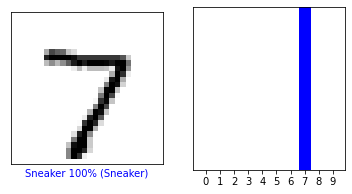

In [135]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

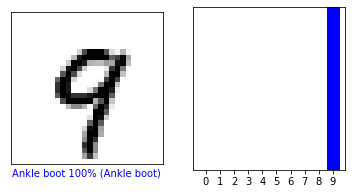

In [136]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [ ]:
2. Una CNN con:

    1 capa convolutiva con 8 neuronas
    1 MaxPool quedando las dimensiones de la imagen a la mitad
    1 dropout 0.25
    1 Flatten
    1 dense con 16 neuronas
    1 dense con 32 neuronas
    1 dense con 10 (salida)

In [137]:
# Configurar capas
"""
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
"""
tf.config.run_functions_eagerly(True)


INPUT_SHAPE = (28,28,1)

model = keras.models.Sequential()
# filte= numero neuronas
# First conv-pool layers - set 1
model.add(keras.layers.Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="valid", input_shape=INPUT_SHAPE))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))


# Flatten layer
model.add(keras.layers.Flatten())

# Dense layer with dropout
model.add(keras.layers.Dense(units=16, activation="relu"))
model.add(keras.layers.Dense(units=32, activation="relu"))
model.add(keras.layers.Dropout(rate=0.25))
# Output layer
model.add(keras.layers.Dense(units=10, activation="softmax"))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 1352)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 16)                21648     
_________________________________________________________________
dense_23 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)              

In [138]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [139]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.4709 - accuracy: 0.8553
Epoch 2/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1952 - accuracy: 0.9439
Epoch 3/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1429 - accuracy: 0.9581
Epoch 4/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1144 - accuracy: 0.9668
Epoch 5/10
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0989 - accuracy: 0.9715
Epoch 6/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0875 - accuracy: 0.9745
Epoch 7/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0799 - accuracy: 0.9764
Epoch 8/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0684 - accuracy: 0.9794
Epoch 9/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0649 - accuracy: 0.9810
Epoch 10/10
1875/1875 [==============================] - 43s 23m

### Evaluar Exactitud
Siguente, compare como el rendimiento del modelo sobre el set de datos:

In [140]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.0690 - accuracy: 0.9799

Test accuracy: 0.9799000024795532


In [ ]:
SIN DUDA ES MEJOR EL PRIMER MODELO CON DENSE 32 - DENSE 10

In [ ]:
############################################################

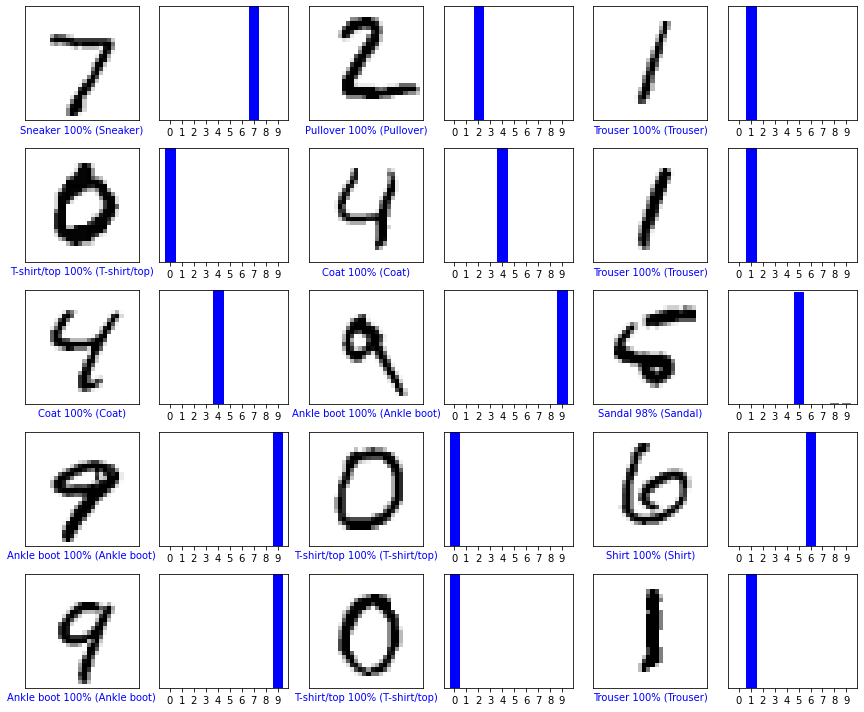

In [141]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [145]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [146]:
# Ahora prediga la etiqueta correcta para esta imagen:
predictions_single = model.predict(img)

print(predictions_single)

[[5.0163543e-11 5.2833560e-09 1.0000000e+00 5.8010870e-11 7.8721009e-13
  6.4580313e-14 8.8243690e-11 2.7500079e-16 6.1157038e-11 1.0630168e-16]]


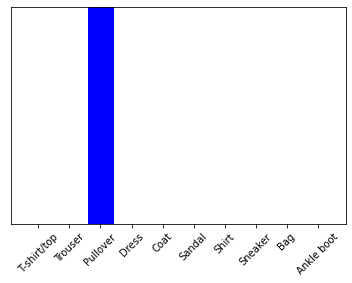

In [147]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [148]:
np.argmax(predictions_single[0])

2